## Kütüphaneleri İçe Aktarma:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold


# Grafiklerin doğrudan not defterinde gösterilmesini sağlar
%matplotlib inline

# Uyarıları yok say
import warnings
warnings.filterwarnings("ignore")


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Veri Setlerinin Yüklenmesi
</h2>
Aşağıdaki kod, iki farklı CSV dosyasını okuyarak eğitim ve test veri setlerini yükler:
</font>

In [2]:
train = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Home-Loan-Eligibility-Predictor\dataset\train_ctrUa4K.csv")
test = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Home-Loan-Eligibility-Predictor\dataset\test_lAUu6dG.csv")

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Eğitim Veri Setindeki Eksik Verilerin Doldurulması
</h2>
Aşağıdaki kod, eğitim veri setindeki eksik (NaN) değerleri, her sütunun mod (en sık görülen değer) ile doldurur:
</font>

In [3]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace = True)
train["Married"].fillna(train["Married"].mode()[0], inplace = True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace = True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace = True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Test Veri Setindeki Eksik Verilerin Doldurulması
</h2>
Aşağıdaki kod, test veri setindeki eksik (NaN) değerleri, her sütunun mod (en sık görülen değer) ile doldurur:
</font>

In [4]:
test["Gender"].fillna(test["Gender"].mode()[0], inplace = True)
test["Married"].fillna(test["Married"].mode()[0], inplace = True)
test["Dependents"].fillna(test["Dependents"].mode()[0], inplace = True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0], inplace = True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0], inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
Loan_Amount_Term Sütunundaki Eksik Verilerin Doldurulması
</h2>
Aşağıdaki kod, hem eğitim (<strong>train</strong>) hem de test (<strong>test</strong>) veri setlerinde, <strong>Loan_Amount_Term</strong> sütunundaki eksik (<strong>NaN</strong>) değerleri en sık görülen değer (<strong>mod</strong>) ile doldurur:
</font>

In [5]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace = True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0], inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>
LoanAmount Sütunundaki Eksik Verilerin Doldurulması
</h2>
Aşağıdaki kod, hem eğitim (<strong>train</strong>) hem de test (<strong>test</strong>) veri setlerinde, <strong>LoanAmount</strong> sütunundaki eksik (<strong>NaN</strong>) değerleri sütunun <strong>medyan</strong> değeriyle doldurur:
</font>

In [6]:
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace = True)
test["LoanAmount"].fillna(test["LoanAmount"].median(), inplace = True)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>Toplam Gelir Hesaplama (Total Income Calculation)</h2>

<strong>Başvuran (Applicant)</strong> ve <strong>eş başvuran (Coapplicant)</strong> gelirlerinin (<strong>Income</strong>) toplamı hesaplanarak "<strong>Total_Income</strong>" adlı yeni bir sütun (<strong>Column</strong>) oluşturuluyor:
</font>

In [7]:
# Total Income hesaplama
train["Total_Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]
test["Total_Income"] = test["ApplicantIncome"] + test["CoapplicantIncome"]

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>Logaritmik Toplam Gelir Hesaplama</h2>
<strong>Total Income</strong> dağılımı sağa çarpıktır. Bu durumu düzeltmek için <strong>logaritma dönüşümü (logarithmic transformation)</strong> yaptık:
</font>

In [8]:
# Logarithmic Total Income hesaplama
train["Total_Income_log"] = np.log(train["Total_Income"])
test["Total_Income_log"] = np.log(test["Total_Income"])

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>EMI Hesaplama (EMI Calculation)</h2>
<strong>EMI (Equal Monthly Installment)</strong> hesaplamak için, <strong>kredi miktarı (LoanAmount)</strong> <strong>kredi geri ödeme süresine (Loan_Amount_Term)</strong> bölündü:
</font>


In [9]:
# EMI hesaplama
train["EMI"] = train["LoanAmount"] / train["Loan_Amount_Term"]
test["EMI"] = test["LoanAmount"] / test["Loan_Amount_Term"]

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>Balance Income Hesaplama (Balance Income Calculation)</h2>
<strong>Balance Income</strong>, <strong>toplam gelirden (Total Income)</strong> <strong>EMI'nin (Equal Monthly Installment)</strong> 1000 ile çarpımı çıkarılarak hesaplanır:
</font>

In [10]:
# Balance Income hesaplama
train["Balance_Income"] = train["Total_Income"] - (train["EMI"] * 1000)
test["Balance_Income"] = test["Total_Income"] - (test["EMI"] * 1000)

<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2>Gereksiz Sütunları Kaldırma (Dropping Unnecessary Columns)</h2>

<strong>ApplicantIncome</strong>, <strong>CoapplicantIncome</strong>, <strong>LoanAmount</strong>, ve <strong>Loan_Amount_Term</strong> sütunları, veri setinden çıkarıldı:
</font>

In [11]:
train = train.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis = 1)
test = test.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis = 1)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd

In [13]:
test_id = test["Loan_ID"]

# "Loan_ID" kolonunu kaldır
train = train.drop("Loan_ID", axis=1)
test = test.drop("Loan_ID", axis=1)

X = train.drop("Loan_Status", axis=1)
y = train.Loan_Status

# Eğitim setindeki kategorik sütunları belirleyin ve One-Hot Encoding uygulayın
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Test setindeki kategorik sütunları belirleyin ve One-Hot Encoding uygulayın
test_categorical_cols = test.select_dtypes(include=['object']).columns
test = pd.get_dummies(test, columns=test_categorical_cols, drop_first=True)


<font size="4" style="padding: 10px; font-family: Arial, sans-serif; line-height: 1.6; display: block; margin-bottom: 15px; text-align: justify;">
<h2 style="font-family: Arial, sans-serif;">Random Forest Algoritması</h2>
  <strong>Random Forest</strong>, bir dizi <strong>decision tree</strong> (karar ağacı) kullanarak güçlü bir <strong>predictive model</strong> (tahmin modeli) oluşturan <strong>ensemble learning</strong> (toplu öğrenme) tabanlı bir algoritmadır. Her bir karar ağacı, <strong>bootstrap sampling</strong> (bootstrap örnekleme) yöntemiyle, verinin rastgele bir alt kümesi ve <strong>random feature selection</strong> (rastgele özellik seçimi) ile eğitilir. Bu sayede her bir ağaç, veri üzerinde farklı bir <strong>perspective</strong> (bakış açısı) ile öğrenir ve modelin <strong>genelleme kapasitesini</strong> artırır.
  <br><br>
  Her bir <strong>individual tree</strong> (bireysel ağaç) kendi tahminini yapar ve nihai tahmin, tüm bu ağaçlardan alınan tahminlerin <strong>aggregation</strong> (birleşim) yöntemiyle elde edilir. Bu birleşim, modelin <strong>robustness</strong> (sağlamlık) ve <strong>accuracy</strong> (doğruluk) seviyesini artırır, ayrıca <strong>overfitting</strong> (aşırı uyum) riskini minimize eder.
  <br><br>
  <strong>Regression problems</strong> (regresyon problemleri) için, nihai tahmin, tüm ağaçlardan gelen tahminlerin <strong>mean</strong> (ortalama) alınarak yapılır. Bu yöntem, tahminlerin daha <strong>stable</strong> (istikrarlı) ve <strong>reliable</strong> (güvenilir) olmasını sağlar.
</font>

In [14]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

In [16]:
# K-Fold Cross Validation
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Değerlendirme skorları
validation_scores = []

for train_index, test_index in kf.split(X, y):
    print("\n{} of kfold {}".format(i,kf.n_splits))

    # Eğitim ve test veri setlerini ayır
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]

    # Modeli eğit
    model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=21)
    model.fit(xtr, ytr)

    # Doğrulama setinde tahmin yap
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    validation_scores.append(score)
    print(f"Accuracy Score for Fold {i}: {score}")

    i += 1

# Test setinde tahmin yap
pred_final = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy Score for Fold 1: 0.8292682926829268

2 of kfold 5
Accuracy Score for Fold 2: 0.8455284552845529

3 of kfold 5
Accuracy Score for Fold 3: 0.7804878048780488

4 of kfold 5
Accuracy Score for Fold 4: 0.7642276422764228

5 of kfold 5
Accuracy Score for Fold 5: 0.7868852459016393


In [17]:
# Validation Skorlarının ortalamasını hesapla
mean_validation_score = np.mean(validation_scores)
print(f"\nMean Validation Accuracy: {mean_validation_score}")

# Doğrulama setinde tahmin yap
pred_val = model.predict(x_cv)

# Leaderboard skoru için doğru değişkeni kullan
leaderboard_score = accuracy_score(y_cv, pred_val)  # pred_val doğru olan değişken
print(f"Leaderboard Accuracy: {leaderboard_score}")



Mean Validation Accuracy: 0.8012794882047182
Leaderboard Accuracy: 0.8540540540540541


In [18]:
# Boş bir DataFrame oluşturuyoruz
submission = pd.DataFrame()
# Loan_ID sütununu ekliyoruz
submission['Loan_ID'] = test_id
# Loan_Status sütununu ekliyoruz
submission['Loan_Status'] = pred_final

In [19]:
pd.DataFrame(submission, columns = ["Loan_ID", "Loan_Status"]).to_csv("RandomForestClassifier.csv", index=False)

<Axes: >

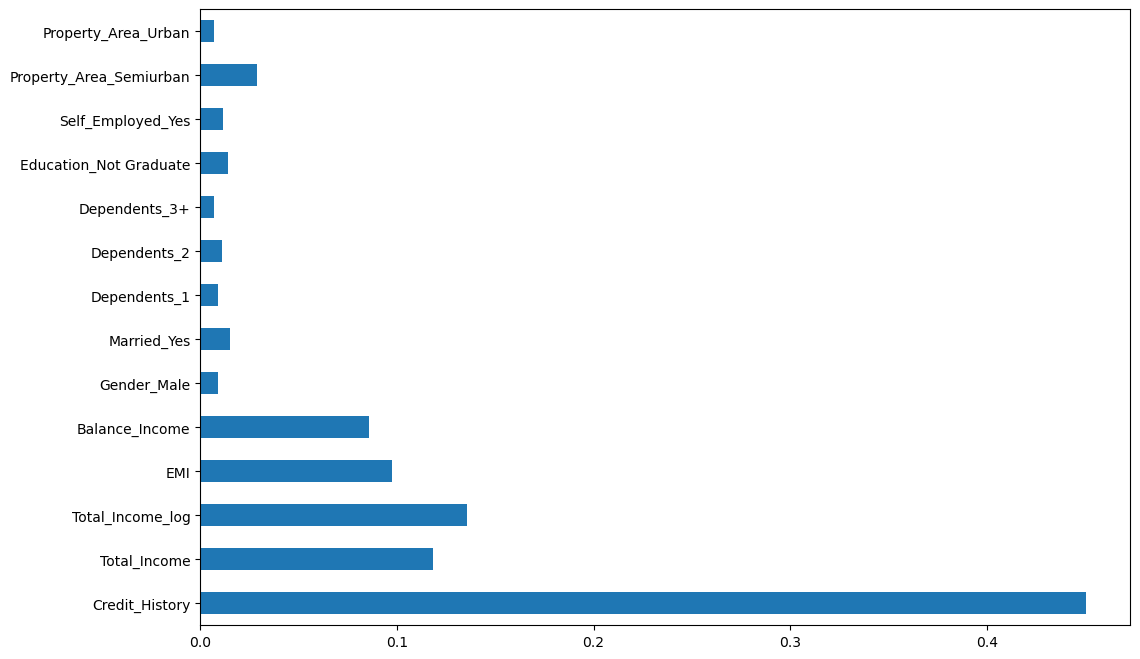

In [20]:
importances = pd.Series(model.feature_importances_, index= X.columns)
importances.plot(kind = "barh", figsize = (12,8))